In [1]:
import pandas as pd
from sklearn import preprocessing

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Data/requiredMunicipalities_temperature_precipitation_elevation_DengueCasesWeek.csv')
# Remove extra column
data = data.drop('Unnamed: 0', 1)

In [3]:
data.head()

,State,Municipality,PRECIPITATION_jan_07,PRECIPITATION_feb_07,PRECIPITATION_mar_07,PRECIPITATION_apr_07,PRECIPITATION_may_07,PRECIPITATION_jun_07,PRECIPITATION_jul_07,PRECIPITATION_aug_07,...,2019/w43,2019/w44,2019/w45,2019/w46,2019/w47,2019/w48,2019/w49,2019/w50,2019/w51,2019/w52
0,antioquia,alejandria,66.638855,66.628891,199.928375,286.881470,345.874695,161.073792,339.436737,324.082489,...,0,0,0,0,0,0,0,0,0,0
1,antioquia,amaga,62.527489,46.315376,166.522003,288.957397,350.666260,143.757507,350.168793,210.302658,...,0,0,0,0,0,1,1,1,0,0
2,antioquia,amalfi,76.737572,62.784908,198.478897,322.928314,381.405701,191.377609,387.475983,408.289520,...,0,0,0,0,0,0,0,0,1,0
3,antioquia,andes,115.193504,61.572941,205.126846,308.268433,332.884583,116.664536,310.750671,189.581451,...,0,0,0,0,1,0,0,0,0,0
4,antioquia,angelopolis,69.933151,43.129227,178.370377,278.665588,326.885010,144.349655,360.914429,234.040939,...,0,0,0,0,0,0,0,0,0,0


# Data Pre-processing

In [4]:
##temp data
x_temperature = data[data.columns[147:291]]
x_temperature.head()

,TEMPERATURE_jan_07,TEMPERATURE_feb_07,TEMPERATURE_mar_07,TEMPERATURE_apr_07,TEMPERATURE_may_07,TEMPERATURE_jun_07,TEMPERATURE_jul_07,TEMPERATURE_aug_07,TEMPERATURE_sep_07,TEMPERATURE_oct_07,...,TEMPERATURE_mar_18,TEMPERATURE_apr_18,TEMPERATURE_may_18,TEMPERATURE_jun_18,TEMPERATURE_jul_18,TEMPERATURE_aug_18,TEMPERATURE_sep_18,TEMPERATURE_oct_18,TEMPERATURE_nov_18,TEMPERATURE_dec_18
0,20.606707,20.672624,21.210392,21.113854,21.331241,21.114738,21.333450,20.634999,20.499266,19.855212,...,21.489558,20.985991,21.025772,21.377411,21.652374,21.425886,21.230342,20.725872,20.687894,20.574121
1,20.814870,20.851651,21.328261,21.144019,21.174519,20.900712,21.281823,20.447760,20.407709,19.706597,...,21.648314,21.020582,20.880769,21.149931,21.560988,21.380573,21.026458,20.558420,20.625113,20.717262
2,21.520126,21.536331,22.240293,22.223073,22.306279,22.010652,22.411260,21.424171,21.347958,20.695219,...,22.440292,22.133230,21.910445,22.177232,22.709351,22.234674,22.014884,21.497476,21.550504,21.471094
3,17.030849,16.976915,17.263741,17.063804,17.199818,17.035077,17.151788,16.501156,16.793839,15.996531,...,17.669470,16.954950,16.968828,17.341847,17.520799,17.428500,17.365973,16.974917,17.126363,17.195797
4,20.095986,20.092206,20.527178,20.310996,20.335141,20.198780,20.571788,19.733009,19.727717,19.003105,...,20.841154,20.195543,20.037224,20.429421,20.838454,20.657140,20.333967,19.815866,19.987836,20.030714


In [5]:
#precip data
x_precipitation = data[data.columns[2:146]]
x_precipitation.head()

,PRECIPITATION_jan_07,PRECIPITATION_feb_07,PRECIPITATION_mar_07,PRECIPITATION_apr_07,PRECIPITATION_may_07,PRECIPITATION_jun_07,PRECIPITATION_jul_07,PRECIPITATION_aug_07,PRECIPITATION_sep_07,PRECIPITATION_oct_07,...,PRECIPITATION_mar_18,PRECIPITATION_apr_18,PRECIPITATION_may_18,PRECIPITATION_jun_18,PRECIPITATION_jul_18,PRECIPITATION_aug_18,PRECIPITATION_sep_18,PRECIPITATION_oct_18,PRECIPITATION_nov_18,PRECIPITATION_dec_18
0,66.638855,66.628891,199.928375,286.881470,345.874695,161.073792,339.436737,324.082489,243.856186,361.769562,...,147.506775,292.958588,436.878143,225.225449,195.619019,256.421906,302.413086,353.701385,277.470184,61.464046
1,62.527489,46.315376,166.522003,288.957397,350.666260,143.757507,350.168793,210.302658,214.617142,283.321747,...,117.747261,256.695129,421.436859,195.391815,162.015167,182.192062,274.654327,259.078125,282.538574,68.923813
2,76.737572,62.784908,198.478897,322.928314,381.405701,191.377609,387.475983,408.289520,306.408356,385.371216,...,164.738312,349.761841,433.156830,264.976685,236.360321,286.805847,330.032654,388.256378,315.904602,71.508133
3,115.193504,61.572941,205.126846,308.268433,332.884583,116.664536,310.750671,189.581451,194.997574,333.450806,...,144.462082,262.342285,394.904175,158.639008,142.633423,161.990524,246.869614,293.866364,298.362244,85.697762
4,69.933151,43.129227,178.370377,278.665588,326.885010,144.349655,360.914429,234.040939,214.994553,291.776550,...,126.783783,247.130173,390.748199,197.610321,163.057632,205.655136,273.291779,268.090820,284.551331,67.718147


In [6]:
# Columns week 2007 - 2018
y_data = data[data.columns[343:-52]]
y_data.head()

,2007/w01,2007/w02,2007/w03,2007/w04,2007/w05,2007/w06,2007/w07,2007/w08,2007/w09,2007/w10,...,2018/w43,2018/w44,2018/w45,2018/w46,2018/w47,2018/w48,2018/w49,2018/w50,2018/w51,2018/w52
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Temp, Percip and Cases weekly 2007-2018 for Medellin

### Temp, Percip, Cases for Medellin from original data  (sivigila - cases) (wclim- prep and temp)

In [7]:
data_medellin = data[data.Municipality=='medellin']
data_medellin

,State,Municipality,PRECIPITATION_jan_07,PRECIPITATION_feb_07,PRECIPITATION_mar_07,PRECIPITATION_apr_07,PRECIPITATION_may_07,PRECIPITATION_jun_07,PRECIPITATION_jul_07,PRECIPITATION_aug_07,...,2019/w43,2019/w44,2019/w45,2019/w46,2019/w47,2019/w48,2019/w49,2019/w50,2019/w51,2019/w52
62,antioquia,medellin,65.4114,49.307404,195.452469,291.927124,345.532501,157.963028,386.515533,230.007416,...,29,17,35,16,21,15,20,30,14,5


### PRECIPITATION DATA

In [8]:
x_precipitation_medellin = data_medellin[data_medellin.columns[2:146]]
x_precipitation_medellin

,PRECIPITATION_jan_07,PRECIPITATION_feb_07,PRECIPITATION_mar_07,PRECIPITATION_apr_07,PRECIPITATION_may_07,PRECIPITATION_jun_07,PRECIPITATION_jul_07,PRECIPITATION_aug_07,PRECIPITATION_sep_07,PRECIPITATION_oct_07,...,PRECIPITATION_mar_18,PRECIPITATION_apr_18,PRECIPITATION_may_18,PRECIPITATION_jun_18,PRECIPITATION_jul_18,PRECIPITATION_aug_18,PRECIPITATION_sep_18,PRECIPITATION_oct_18,PRECIPITATION_nov_18,PRECIPITATION_dec_18
62,65.4114,49.307404,195.452469,291.927124,345.532501,157.963028,386.515533,230.007416,234.679382,320.92984,...,140.323318,267.799438,418.379303,219.436752,180.841248,200.803131,294.888611,302.151306,276.914551,67.528


In [9]:
x_precipitation_medellin_transposed = x_precipitation_medellin.T
x_precipitation_medellin_transposed = x_precipitation_medellin_transposed.rename(columns= {62:'percipitation_medellin'})  ##integer
x_precipitation_medellin_transposed

,percipitation_medellin
PRECIPITATION_jan_07,65.411400
PRECIPITATION_feb_07,49.307404
PRECIPITATION_mar_07,195.452469
PRECIPITATION_apr_07,291.927124
PRECIPITATION_may_07,345.532501
...,...
PRECIPITATION_aug_18,200.803131
PRECIPITATION_sep_18,294.888611
PRECIPITATION_oct_18,302.151306
PRECIPITATION_nov_18,276.914551


### Date of precipitation

In [10]:
x_precipitation_medellin_transposed['DATE']=x_precipitation_medellin_transposed.index.str.split("_")
x_precipitation_medellin_transposed

,percipitation_medellin,DATE
PRECIPITATION_jan_07,65.411400,"[PRECIPITATION, jan, 07]"
PRECIPITATION_feb_07,49.307404,"[PRECIPITATION, feb, 07]"
PRECIPITATION_mar_07,195.452469,"[PRECIPITATION, mar, 07]"
PRECIPITATION_apr_07,291.927124,"[PRECIPITATION, apr, 07]"
PRECIPITATION_may_07,345.532501,"[PRECIPITATION, may, 07]"
...,...,...
PRECIPITATION_aug_18,200.803131,"[PRECIPITATION, aug, 18]"
PRECIPITATION_sep_18,294.888611,"[PRECIPITATION, sep, 18]"
PRECIPITATION_oct_18,302.151306,"[PRECIPITATION, oct, 18]"
PRECIPITATION_nov_18,276.914551,"[PRECIPITATION, nov, 18]"


In [11]:
#get year from date column
x_precipitation_medellin_transposed['YEAR'] = x_precipitation_medellin_transposed['DATE'].apply(lambda x: "20" + x[2])  
x_precipitation_medellin_transposed.head()

,percipitation_medellin,DATE,YEAR
PRECIPITATION_jan_07,65.411400,"[PRECIPITATION, jan, 07]",2007
PRECIPITATION_feb_07,49.307404,"[PRECIPITATION, feb, 07]",2007
PRECIPITATION_mar_07,195.452469,"[PRECIPITATION, mar, 07]",2007
PRECIPITATION_apr_07,291.927124,"[PRECIPITATION, apr, 07]",2007
PRECIPITATION_may_07,345.532501,"[PRECIPITATION, may, 07]",2007


In [12]:
#get year from date column
x_precipitation_medellin_transposed['MONTH'] = x_precipitation_medellin_transposed['DATE'].apply(lambda x: x[1])  
x_precipitation_medellin_transposed.head()

,percipitation_medellin,DATE,YEAR,MONTH
PRECIPITATION_jan_07,65.411400,"[PRECIPITATION, jan, 07]",2007,jan
PRECIPITATION_feb_07,49.307404,"[PRECIPITATION, feb, 07]",2007,feb
PRECIPITATION_mar_07,195.452469,"[PRECIPITATION, mar, 07]",2007,mar
PRECIPITATION_apr_07,291.927124,"[PRECIPITATION, apr, 07]",2007,apr
PRECIPITATION_may_07,345.532501,"[PRECIPITATION, may, 07]",2007,may


In [13]:
## change month to numeric
def month_as_int(month):
  if month == 'jan':
    return '01'
  if month == 'feb':
    return '02' 
  if month == 'mar':
    return '03'
  if month == 'apr':
    return '04' 
  if month == 'may':
    return '05'
  if month == 'jun':
    return '06' 
  if month == 'jul':
    return '07'
  if month == 'aug':
    return '08' 
  if month == 'sep':
    return '09'
  if month == 'oct':
    return '10' 
  if month == 'nov':
    return '11'   
  if month == 'dec':
    return '12'


In [14]:
x_precipitation_medellin_transposed

,percipitation_medellin,DATE,YEAR,MONTH
PRECIPITATION_jan_07,65.411400,"[PRECIPITATION, jan, 07]",2007,jan
PRECIPITATION_feb_07,49.307404,"[PRECIPITATION, feb, 07]",2007,feb
PRECIPITATION_mar_07,195.452469,"[PRECIPITATION, mar, 07]",2007,mar
PRECIPITATION_apr_07,291.927124,"[PRECIPITATION, apr, 07]",2007,apr
PRECIPITATION_may_07,345.532501,"[PRECIPITATION, may, 07]",2007,may
...,...,...,...,...
PRECIPITATION_aug_18,200.803131,"[PRECIPITATION, aug, 18]",2018,aug
PRECIPITATION_sep_18,294.888611,"[PRECIPITATION, sep, 18]",2018,sep
PRECIPITATION_oct_18,302.151306,"[PRECIPITATION, oct, 18]",2018,oct
PRECIPITATION_nov_18,276.914551,"[PRECIPITATION, nov, 18]",2018,nov


In [15]:
#change the month from jan to 01 and apply to every row in the df
x_precipitation_medellin_transposed['MONTH'] = x_precipitation_medellin_transposed['MONTH'].apply(lambda x: month_as_int(month=x.strip()))
x_precipitation_medellin_transposed.head()

,percipitation_medellin,DATE,YEAR,MONTH
PRECIPITATION_jan_07,65.411400,"[PRECIPITATION, jan, 07]",2007,01
PRECIPITATION_feb_07,49.307404,"[PRECIPITATION, feb, 07]",2007,02
PRECIPITATION_mar_07,195.452469,"[PRECIPITATION, mar, 07]",2007,03
PRECIPITATION_apr_07,291.927124,"[PRECIPITATION, apr, 07]",2007,04
PRECIPITATION_may_07,345.532501,"[PRECIPITATION, may, 07]",2007,05


In [16]:
x_precipitation_medellin_transposed['MONTH']=x_precipitation_medellin_transposed['MONTH'].astype(int)

### TEMPERATURE DATA

In [17]:
##temp data
x_temperature_medellin = data_medellin[data_medellin.columns[147:291]]
x_temperature_medellin.head()

,TEMPERATURE_jan_07,TEMPERATURE_feb_07,TEMPERATURE_mar_07,TEMPERATURE_apr_07,TEMPERATURE_may_07,TEMPERATURE_jun_07,TEMPERATURE_jul_07,TEMPERATURE_aug_07,TEMPERATURE_sep_07,TEMPERATURE_oct_07,...,TEMPERATURE_mar_18,TEMPERATURE_apr_18,TEMPERATURE_may_18,TEMPERATURE_jun_18,TEMPERATURE_jul_18,TEMPERATURE_aug_18,TEMPERATURE_sep_18,TEMPERATURE_oct_18,TEMPERATURE_nov_18,TEMPERATURE_dec_18
62,21.009283,20.982925,21.425911,21.237032,21.322522,21.243176,21.686978,20.866394,20.705536,19.954406,...,21.726171,21.124271,21.037365,21.457151,21.952168,21.719432,21.347202,20.748416,20.886703,20.936353


In [18]:
x_temperature_medellin_transposed = x_temperature_medellin.T
x_temperature_medellin_transposed = x_temperature_medellin_transposed.rename(columns= {62:'temperature_medellin'})  ##integer
x_temperature_medellin_transposed

,temperature_medellin
TEMPERATURE_jan_07,21.009283
TEMPERATURE_feb_07,20.982925
TEMPERATURE_mar_07,21.425911
TEMPERATURE_apr_07,21.237032
TEMPERATURE_may_07,21.322522
...,...
TEMPERATURE_aug_18,21.719432
TEMPERATURE_sep_18,21.347202
TEMPERATURE_oct_18,20.748416
TEMPERATURE_nov_18,20.886703


In [19]:
x_temperature_medellin_transposed['DATE']=x_temperature_medellin_transposed.index.str.split("_")
x_temperature_medellin_transposed

,temperature_medellin,DATE
TEMPERATURE_jan_07,21.009283,"[TEMPERATURE, jan, 07]"
TEMPERATURE_feb_07,20.982925,"[TEMPERATURE, feb, 07]"
TEMPERATURE_mar_07,21.425911,"[TEMPERATURE, mar, 07]"
TEMPERATURE_apr_07,21.237032,"[TEMPERATURE, apr, 07]"
TEMPERATURE_may_07,21.322522,"[TEMPERATURE, may, 07]"
...,...,...
TEMPERATURE_aug_18,21.719432,"[TEMPERATURE, aug, 18]"
TEMPERATURE_sep_18,21.347202,"[TEMPERATURE, sep, 18]"
TEMPERATURE_oct_18,20.748416,"[TEMPERATURE, oct, 18]"
TEMPERATURE_nov_18,20.886703,"[TEMPERATURE, nov, 18]"


In [20]:
#get year from date column
x_temperature_medellin_transposed['YEAR'] = x_temperature_medellin_transposed['DATE'].apply(lambda x: "20" + x[2])  
x_temperature_medellin_transposed.head()

,temperature_medellin,DATE,YEAR
TEMPERATURE_jan_07,21.009283,"[TEMPERATURE, jan, 07]",2007
TEMPERATURE_feb_07,20.982925,"[TEMPERATURE, feb, 07]",2007
TEMPERATURE_mar_07,21.425911,"[TEMPERATURE, mar, 07]",2007
TEMPERATURE_apr_07,21.237032,"[TEMPERATURE, apr, 07]",2007
TEMPERATURE_may_07,21.322522,"[TEMPERATURE, may, 07]",2007


In [21]:
#get year from date column
x_temperature_medellin_transposed['MONTH'] = x_temperature_medellin_transposed['DATE'].apply(lambda x: x[1])  
x_temperature_medellin_transposed.head()

,temperature_medellin,DATE,YEAR,MONTH
TEMPERATURE_jan_07,21.009283,"[TEMPERATURE, jan, 07]",2007,jan
TEMPERATURE_feb_07,20.982925,"[TEMPERATURE, feb, 07]",2007,feb
TEMPERATURE_mar_07,21.425911,"[TEMPERATURE, mar, 07]",2007,mar
TEMPERATURE_apr_07,21.237032,"[TEMPERATURE, apr, 07]",2007,apr
TEMPERATURE_may_07,21.322522,"[TEMPERATURE, may, 07]",2007,may


In [22]:
#change the month from jan to 01 and apply to every row in the df
x_temperature_medellin_transposed['MONTH'] = x_temperature_medellin_transposed['MONTH'].apply(lambda x: month_as_int(month=x.strip()))
x_temperature_medellin_transposed.head()

,temperature_medellin,DATE,YEAR,MONTH
TEMPERATURE_jan_07,21.009283,"[TEMPERATURE, jan, 07]",2007,01
TEMPERATURE_feb_07,20.982925,"[TEMPERATURE, feb, 07]",2007,02
TEMPERATURE_mar_07,21.425911,"[TEMPERATURE, mar, 07]",2007,03
TEMPERATURE_apr_07,21.237032,"[TEMPERATURE, apr, 07]",2007,04
TEMPERATURE_may_07,21.322522,"[TEMPERATURE, may, 07]",2007,05


In [23]:
x_temperature_medellin_transposed['MONTH'] = x_temperature_medellin_transposed['MONTH'].astype(int)

## Dengue Cases

In [24]:
x_cases_medellin = data_medellin[data_medellin.columns[343:-52]]
x_cases_medellin
x_cases_transposed_medellin=x_cases_medellin.T
x_cases_transposed_medellin
x_cases_transposed_medellin=x_cases_transposed_medellin.rename(columns= {62:'cases_medellin'})  ##integer
x_cases_transposed_medellin

,cases_medellin
2007/w01,1
2007/w02,0
2007/w03,0
2007/w04,0
2007/w05,0
...,...
2018/w48,28
2018/w49,12
2018/w50,27
2018/w51,17


In [25]:
x_cases_transposed_medellin['DATA'] = x_cases_transposed_medellin.index.str.split('/')  #index column split function though works on string only -> yyyy week
x_cases_transposed_medellin

,cases_medellin,DATA
2007/w01,1,"[2007, w01]"
2007/w02,0,"[2007, w02]"
2007/w03,0,"[2007, w03]"
2007/w04,0,"[2007, w04]"
2007/w05,0,"[2007, w05]"
...,...,...
2018/w48,28,"[2018, w48]"
2018/w49,12,"[2018, w49]"
2018/w50,27,"[2018, w50]"
2018/w51,17,"[2018, w51]"


In [26]:
x_cases_transposed_medellin['YEAR'] = x_cases_transposed_medellin['DATA'].apply(lambda x: x[0])
x_cases_transposed_medellin

,cases_medellin,DATA,YEAR
2007/w01,1,"[2007, w01]",2007
2007/w02,0,"[2007, w02]",2007
2007/w03,0,"[2007, w03]",2007
2007/w04,0,"[2007, w04]",2007
2007/w05,0,"[2007, w05]",2007
...,...,...,...
2018/w48,28,"[2018, w48]",2018
2018/w49,12,"[2018, w49]",2018
2018/w50,27,"[2018, w50]",2018
2018/w51,17,"[2018, w51]",2018


In [27]:
x_cases_transposed_medellin['YearWeek'] = x_cases_transposed_medellin['DATA'].apply(lambda x: x[0] + x[1].split('w')[1])  ##concate year and week index 0 and 1 in a list and apply to all rows
x_cases_transposed_medellin

,cases_medellin,DATA,YEAR,YearWeek
2007/w01,1,"[2007, w01]",2007,200701
2007/w02,0,"[2007, w02]",2007,200702
2007/w03,0,"[2007, w03]",2007,200703
2007/w04,0,"[2007, w04]",2007,200704
2007/w05,0,"[2007, w05]",2007,200705
...,...,...,...,...
2018/w48,28,"[2018, w48]",2018,201848
2018/w49,12,"[2018, w49]",2018,201849
2018/w50,27,"[2018, w50]",2018,201850
2018/w51,17,"[2018, w51]",2018,201851


In [28]:
#YearWeekInt --> changed to int
x_cases_transposed_medellin['YearWeek'] = x_cases_transposed_medellin['YearWeek'].astype(int)
x_cases_transposed_medellin.head()  #integer

,cases_medellin,DATA,YEAR,YearWeek
2007/w01,1,"[2007, w01]",2007,200701
2007/w02,0,"[2007, w02]",2007,200702
2007/w03,0,"[2007, w03]",2007,200703
2007/w04,0,"[2007, w04]",2007,200704
2007/w05,0,"[2007, w05]",2007,200705


In [29]:
x_cases_transposed_medellin['LastDayWeek'] = pd.to_datetime((x_cases_transposed_medellin['YearWeek']-1).astype(str) + "6" , format="%Y%U%w")   # 200701+ 6 -> yearweeknumber + weekday 
##-1 -> our data weeknumber e.g. Yearweek 200701 yearweek starts from 01 as week 1 and datatime library starts from 00 as week 1 -> 1 -52 weeks data -> 0-51 weeks datelibrary
## %Uweek number 0 51 = 1 52  ##%w week day sun 0 mon1   0-6=1-7 -> last day of the week -> 6-> Friday!
##Library takes in yearweeknumber + weekday  -> the date form the last day of the week 
x_cases_transposed_medellin

,cases_medellin,DATA,YEAR,YearWeek,LastDayWeek
2007/w01,1,"[2007, w01]",2007,200701,2007-01-06
2007/w02,0,"[2007, w02]",2007,200702,2007-01-13
2007/w03,0,"[2007, w03]",2007,200703,2007-01-20
2007/w04,0,"[2007, w04]",2007,200704,2007-01-27
2007/w05,0,"[2007, w05]",2007,200705,2007-02-03
...,...,...,...,...,...
2018/w48,28,"[2018, w48]",2018,201848,2018-12-01
2018/w49,12,"[2018, w49]",2018,201849,2018-12-08
2018/w50,27,"[2018, w50]",2018,201850,2018-12-15
2018/w51,17,"[2018, w51]",2018,201851,2018-12-22


In [30]:
x_cases_transposed_medellin['MONTH'] = pd.DatetimeIndex(x_cases_transposed_medellin['LastDayWeek']).month  
#x_cases_drop_index.rename(columns ={'MonthMax':'MONTH'},inplace=True)
x_cases_transposed_medellin    ##w5 Jan 2days , Feb 5 days --> MonthMax --> the month for the last day of the week --> Feb wins!

,cases_medellin,DATA,YEAR,YearWeek,LastDayWeek,MONTH
2007/w01,1,"[2007, w01]",2007,200701,2007-01-06,1
2007/w02,0,"[2007, w02]",2007,200702,2007-01-13,1
2007/w03,0,"[2007, w03]",2007,200703,2007-01-20,1
2007/w04,0,"[2007, w04]",2007,200704,2007-01-27,1
2007/w05,0,"[2007, w05]",2007,200705,2007-02-03,2
...,...,...,...,...,...,...
2018/w48,28,"[2018, w48]",2018,201848,2018-12-01,12
2018/w49,12,"[2018, w49]",2018,201849,2018-12-08,12
2018/w50,27,"[2018, w50]",2018,201850,2018-12-15,12
2018/w51,17,"[2018, w51]",2018,201851,2018-12-22,12


### JOIN TEMP AND CASES AND PRECIPITATION

In [31]:
merge_cases_temp = pd.merge(x_cases_transposed_medellin,x_temperature_medellin_transposed, on=['MONTH','YEAR'],how ='left')  ##month and year pair match , to avoid duplicate for each month or year it matches with
merge_cases_temp    ##624  # 143 -> 144 1 month is missing -> DEC!

,cases_medellin,DATA,YEAR,YearWeek,LastDayWeek,MONTH,temperature_medellin,DATE
0,1,"[2007, w01]",2007,200701,2007-01-06,1,21.009283,"[TEMPERATURE, jan, 07]"
1,0,"[2007, w02]",2007,200702,2007-01-13,1,21.009283,"[TEMPERATURE, jan, 07]"
2,0,"[2007, w03]",2007,200703,2007-01-20,1,21.009283,"[TEMPERATURE, jan, 07]"
3,0,"[2007, w04]",2007,200704,2007-01-27,1,21.009283,"[TEMPERATURE, jan, 07]"
4,0,"[2007, w05]",2007,200705,2007-02-03,2,20.982925,"[TEMPERATURE, feb, 07]"
...,...,...,...,...,...,...,...,...
619,28,"[2018, w48]",2018,201848,2018-12-01,12,20.936353,"[TEMPERATURE, dec, 18]"
620,12,"[2018, w49]",2018,201849,2018-12-08,12,20.936353,"[TEMPERATURE, dec, 18]"
621,27,"[2018, w50]",2018,201850,2018-12-15,12,20.936353,"[TEMPERATURE, dec, 18]"
622,17,"[2018, w51]",2018,201851,2018-12-22,12,20.936353,"[TEMPERATURE, dec, 18]"


In [32]:
merge_cases_temp_precip = pd.merge(merge_cases_temp,x_precipitation_medellin_transposed, on=['MONTH','YEAR'],how ='left')  ##month and year pair match , to avoid duplicate for each month or year it matches with
merge_cases_temp_precip

,cases_medellin,DATA,YEAR,YearWeek,LastDayWeek,MONTH,temperature_medellin,DATE_x,percipitation_medellin,DATE_y
0,1,"[2007, w01]",2007,200701,2007-01-06,1,21.009283,"[TEMPERATURE, jan, 07]",65.411400,"[PRECIPITATION, jan, 07]"
1,0,"[2007, w02]",2007,200702,2007-01-13,1,21.009283,"[TEMPERATURE, jan, 07]",65.411400,"[PRECIPITATION, jan, 07]"
2,0,"[2007, w03]",2007,200703,2007-01-20,1,21.009283,"[TEMPERATURE, jan, 07]",65.411400,"[PRECIPITATION, jan, 07]"
3,0,"[2007, w04]",2007,200704,2007-01-27,1,21.009283,"[TEMPERATURE, jan, 07]",65.411400,"[PRECIPITATION, jan, 07]"
4,0,"[2007, w05]",2007,200705,2007-02-03,2,20.982925,"[TEMPERATURE, feb, 07]",49.307404,"[PRECIPITATION, feb, 07]"
...,...,...,...,...,...,...,...,...,...,...
619,28,"[2018, w48]",2018,201848,2018-12-01,12,20.936353,"[TEMPERATURE, dec, 18]",67.528000,"[PRECIPITATION, dec, 18]"
620,12,"[2018, w49]",2018,201849,2018-12-08,12,20.936353,"[TEMPERATURE, dec, 18]",67.528000,"[PRECIPITATION, dec, 18]"
621,27,"[2018, w50]",2018,201850,2018-12-15,12,20.936353,"[TEMPERATURE, dec, 18]",67.528000,"[PRECIPITATION, dec, 18]"
622,17,"[2018, w51]",2018,201851,2018-12-22,12,20.936353,"[TEMPERATURE, dec, 18]",67.528000,"[PRECIPITATION, dec, 18]"


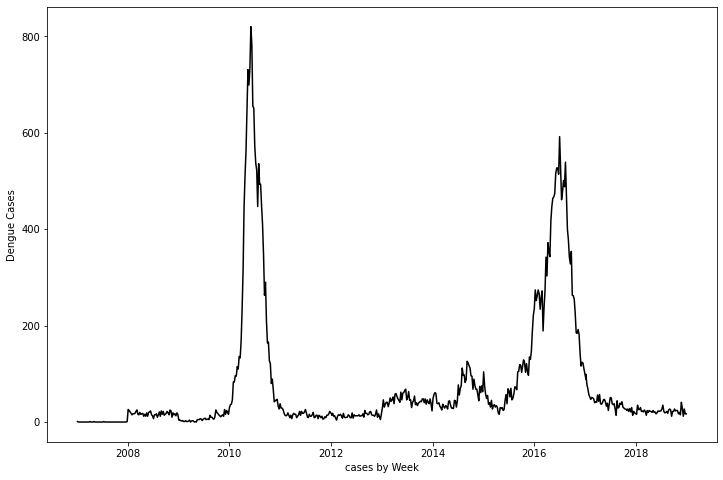

In [33]:
def timeseries (x_axis, y_axis, x_label):
    plt.figure(figsize = (12, 8))
    plt.plot(x_axis, y_axis, color ='black')
    plt.xlabel(x_label) 
    plt.ylabel('Dengue Cases')

timeseries(merge_cases_temp_precip['LastDayWeek'], merge_cases_temp_precip['cases_medellin'], 'cases by Week')

# Prepare data to ARIMA model

In [34]:
dataset = merge_cases_temp_precip[['cases_medellin']]
#dataset.index = merge_cases_temp_precip.LastDayWeek.values
dataset  #DF

,cases_medellin
0,1
1,0
2,0
3,0
4,0
...,...
619,28
620,12
621,27
622,17


## Train Test Split

In [35]:
size = dataset.shape[0]
split = int(size*(9/10))

### Train

In [36]:
train = dataset[:split]
train_data = train['cases_medellin'].tolist()

### Test

In [37]:
test = dataset[split:]
test_data = test['cases_medellin'].tolist()

## ARIMA model

predicted=29.842753, expected=27.000000
predicted=25.646351, expected=27.000000
predicted=25.824251, expected=24.000000
predicted=24.353401, expected=27.000000
predicted=27.519402, expected=22.000000
predicted=22.971690, expected=28.000000
predicted=28.930002, expected=21.000000
predicted=22.321086, expected=30.000000
predicted=31.158792, expected=14.000000
predicted=15.805838, expected=22.000000
predicted=22.533292, expected=19.000000
predicted=18.467898, expected=16.000000
predicted=16.972847, expected=35.000000
predicted=35.832180, expected=26.000000
predicted=28.944966, expected=26.000000
predicted=30.830406, expected=30.000000
predicted=31.524934, expected=22.000000
predicted=22.879837, expected=23.000000
predicted=24.187357, expected=21.000000
predicted=20.887751, expected=25.000000
predicted=25.125679, expected=22.000000
predicted=23.454224, expected=14.000000
predicted=15.935380, expected=24.000000
predicted=23.852980, expected=20.000000
predicted=20.248133, expected=24.000000


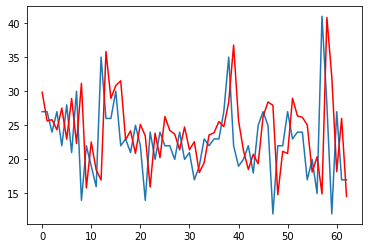

In [38]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

history = [x for x in train_data]
#print(history)
predictions = list()
# walk-forward validation
#print(len(test_data))
for t in range(len(test_data)):    # len test -> 63  range(63)-> 0,62 1-63
    #print(t)
    model = ARIMA(history, order=(5,0,1))
    model_fit = model.fit()
    output = model_fit.forecast()  #nxt week predictions
    yhat = output[0]  ##nxt week output prediction
    predictions.append(yhat) 
    obs = test_data[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
mae = mean_absolute_error(test_data, predictions)  ##mean_absolute_percentage_error
print('Test MAE: %.3f' % mae)
# plot forecasts against actual outcomes
pyplot.plot(test_data)
pyplot.plot(predictions, color='red')
pyplot.show()

<ol>
  <li> <a href="https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/">How to Create an ARIMA Model for Time Series Forecasting in Python</a></li>
</ol>